In [1]:
import numpy as np
import sys
from theano_lstm import lstm_rnn
from network_optimizers import adam_loves_theano, adadelta_fears_committment
from data_managers import character_data_manager

In [2]:
# Ask Jeeves.
data_butler = character_data_manager('/Users/alex/Desktop/data manager/')

In [3]:
%%time
# Get a network
inp_dim = data_butler.ent_vecs.shape[1]
out_dim = data_butler.ent_vecs.shape[0]-1

net_specs = [ (128,100), (128,100) ]

network = lstm_rnn(inp_dim,net_specs,out_dim,log_dir='/Users/alex/Desktop/network logs/2015_11_27/')

CPU times: user 7.35 s, sys: 511 ms, total: 7.87 s
Wall time: 23.3 s


//anaconda/lib/python2.7/site-packages/theano/scan_module/scan_perform_ext.py:133: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


In [4]:
import os
network.save_model(os.path.join(network.get_log_dir(), 'lstm_net.pkl'))

In [5]:
%%time
# Add training functionality
network.initialize_training_adadelta()

CPU times: user 8min 59s, sys: 9.93 s, total: 9min 9s
Wall time: 9min 8s


In [6]:
import os
network.save_model(os.path.join(network.get_log_dir(), 'lstm_net.pkl'))

PicklingError: Can't pickle <type 'function'>: attribute lookup __builtin__.function failed

In [7]:
C = np.zeros(0)

In [8]:
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

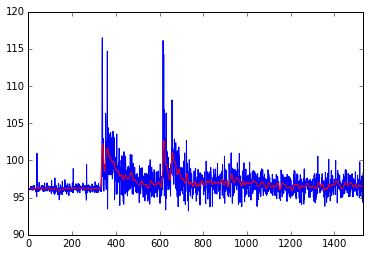

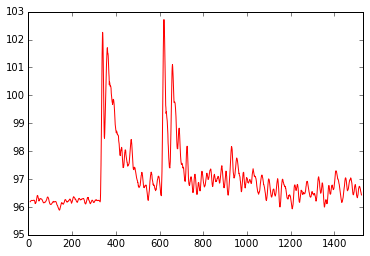

In [78]:
s = 4

w = np.ceil(2*s)
f = np.exp( -.5*(np.arange(-w,w)**2)/(s**2) )
f = f / np.sum(f)

plt.figure();
ax = plt.axes();
ax.plot( C, 'b-', np.arange(w,len(C)-w+1),np.convolve(C,f,'valid'), 'r'  );
ax.set_xlim([0,len(C)]);

plt.figure();
ax = plt.axes();
ax.plot( np.arange(w,len(C)-w+1),np.convolve(C,f,'valid'), 'r'  );
ax.set_xlim([0,len(C)]);

000  95.688
001  96.763
002  95.005
003  96.101
004  96.896
005  97.382
006  95.124
007  96.164
008  95.982
009  95.712
010  98.163
011  95.512
012  97.791
013  96.584
014  97.230
015  95.601
016  97.026
017  97.125
018  98.748
019  97.029
020  96.039
021  96.583
022  98.694
023  97.001
024  96.873
025  96.007
026  96.039
027  95.626
028  96.840
029  96.130
030  96.452
031  98.245
032  97.070
033  95.143
034  96.313
035  97.701
036  97.667
037  98.022
038  96.186
039  95.137
040  97.954
041  97.648
042  95.716
043  97.911
044  98.037
045  97.181
046  96.367
047  96.668
048  96.160
049  98.216
050  95.902
051  97.087
052  95.116
053  97.111
054  95.150
055  96.060
056  97.557
057  95.991
058  96.741
059  96.998
060  96.419
061  97.293
062  95.836
063  97.100
064  98.469
065  96.606
066  96.554
067  96.880
068  96.615
069  95.487
070  95.443
071  96.729
072  95.897
073  95.241
074  98.003
075  96.036
076  96.486
077  96.775
078  96.800
079  97.468
080  96.237
081  96.527
082  95.019
083 

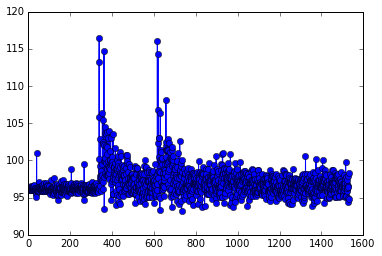

In [77]:
for stps in range(100):
    V,L,A = data_butler.offer_data()

    this_cost = network.adadelta_step_train(V,L,A)
    
    data_butler.advance_schedule()
    
    C = np.hstack( (C,this_cost) )
    print '%03d  %1.3f'%(stps,this_cost)
    sys.stdout.flush()

plt.figure();
ax = plt.axes();
ax.plot( C, 'o-' );